In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3

# An Accurate Replacement Fertiltiy Rate for Bulgaria (And Why It Matters)

### Abstract
In the realm of demographics, the replacement fertiltiy level for a country is usually described as a constant. The general interpretation is that in order to maintain one's population, ignoring certain factors, a state must have a total fertility rate of 2.1 children per woman. While there are good reasons for this, it might help to be a little more accurate than this when looking at specific countries, as each nation deals with its own unique circumstances. In this article we will be looking at whether Bulgaria's replacement fertility level should be slightly different, based on recent population trends and research in other countries.

### Introduction
Before we start analyzing current and recent trends, it is important to understand the different concepts we are using. Here is a list of all the key terms we will be using throughout this article:
* net migration
* growth rate
* (period) life expectancy
* infant mortality rate
* total fertility rate
* replacement fertility rate
* (mean) age of childbearing

Let's take a look at each term individually and create a function for those we might need.

#### Net Migration
Net migration refers to the "net total of migrants" throughout the year. In other words, if we take the number of immigrants ($I$) and subtract the number of emigrants ($E$), we will end up with the net migration ($NM$).

$$ NM = I - E $$

In [2]:
def calculate_net_migration(i, e):
    result = i - e
    return result

#### Growth Rate
A country's growth rate ($GR$) is a percentage that shows the change in its population from the previous year ($P_{p}$). The change itself is depentdent on three variables - number of births ($B$), number of deaths ($D$), and net migration ($NM$). 

$$ GR = \frac{(P_{p} + B - D + NM)}{P_{p}} - 1 $$

In [3]:
def calculate_growth_rate(pp, b, d, nm):
    result = ((pp + b - d + nm) / pp) - 1
    return result

#### !!!(Period) Life Expectancy
This is an estimation of how long a person can expect to live. As there is more than one way to measure this however, we will be using the definition for period life expectancy. This is a projection of the average lifespan of a person born in a certain year based on the "death rates across all age groups" in that same year. It assumes that the age-specific death rates from that year will remain constant throughout the newborns' lives.

#### Infant Mortality Rate
Infant mortality rate ($IMR$) is a probability of a newborn child dying within the first twelve months of its life. Rather than being looked at simply as the number of deaths among newborns ($D_{nb}$) divided by the total of newborns ($B_{nb}$) for a given year, it is expressed as the number of deaths observed per every 1000 infants in that period.

$$ IMR = \frac{D_{nb}}{B_{nb}} \cdot 1000 $$

In [4]:
def calculate_imr(d_nb, b_nb):
    result = (d_nb * 1000) / b_nb
    return result

#### Total Fertility Rate
The total fertility rate in a given year is the "total number of children that would be born to each woman", assuming that she would survive all her fertile years and her births would be "in alignment with the prevailing age-specific fertility rates". Typically, age-specific fertility rates are gathered across different age groups of five year intervals (20-24-year-olds, 25-29-year-olds, etc.). However, some data attained is more accurate, going into every year idividually, as we shall see later. The fertility rate that would ensure a stable population (ignoring migration and changes in mortality rates) is called the replacement fertility level. As mentioned in the abstract, this number is generally considered something of a constant - 2.1 children per woman.

#### Mean Age of Mothers at Childbirth
Also known as mean age of childbearing ($\bar{A_{m}}$), this is calculated by taking the sum of all mothers' ages at the point of their giving birth ($\sum A_{m}$) across all births for that year($B$), no matter whether it is her first born or not.

$$ \bar{A_{m}} = \frac{\sum A_{m}}{B} $$

In [5]:
def calculate_mac(sum_mothers_ages, b):
    result = sum_mothers_ages / b
    return result

### Population (1950-2023)
Now that we have some understanding of the terms, let's see them in practice by looking at data collected by the United Nations from 1950-2023. First of all we have data for population, births, deaths, net migration, and fertility rates. In order to make some better comparisons, we will plot the births and deaths on the same graph.

<function matplotlib.pyplot.show(close=None, block=None)>

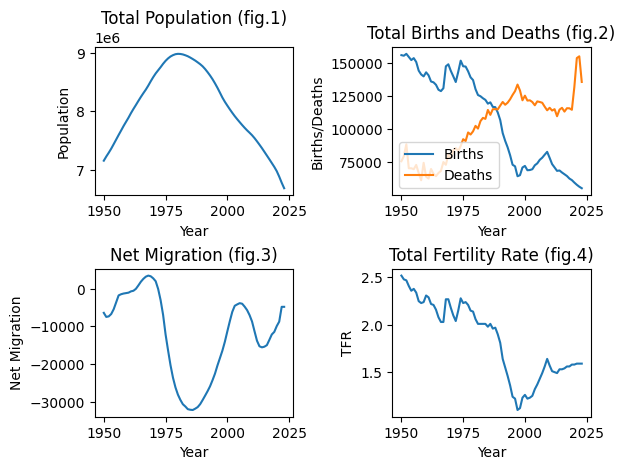

In [6]:
demographics_table = pd.read_csv('sql-database/demographics-table.csv')
age_of_childbearing_table = pd.read_csv('sql-database/age-of-childbearing-table.csv')

f, ax = plt.subplots(2, 2)
ax[0, 0].plot(demographics_table["YearId"].values, demographics_table["Population"].values)
ax[0, 0].set_title("Total Population (fig.1)") 
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("Population")

ax[0, 1].plot(demographics_table["YearId"].values, demographics_table["Births"].values)
ax[0, 1].plot(demographics_table["YearId"].values, demographics_table["Deaths"].values)
ax[0, 1].set_title("Total Births and Deaths (fig.2)") 
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("Births/Deaths")
ax[0, 1].legend(['Births', 'Deaths'], loc="lower left") 

ax[1, 0].plot(demographics_table["YearId"].values, demographics_table["Net Migration"].values)
ax[1, 0].set_title("Net Migration (fig.3)") 
ax[1, 0].set_xlabel("Year")
ax[1, 0].set_ylabel("Net Migration")

ax[1, 1].plot(demographics_table["YearId"].values, demographics_table["Total Fertility Rate"].values)
ax[1, 1].set_title("Total Fertility Rate (fig.4)") 
ax[1, 1].set_xlabel("Year")
ax[1, 1].set_ylabel("TFR")

f.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show

According to the first graph (fig.1), the population of Bulgaria peaked in 1980 and has been decreasing ever since. From this we can conclude that the growth rate of the population has been negative since that year. Net migration (fig.3) appears to be a major factor in this change, as we can see a big shift from more immigrants to more emigrants just after 1970. Historically, especially towards the end of the 1980's, many of these emigrants would likely have been the Bulgarian Turks, who were subjected to the assimilation process by the communist regime of the time. All the while, the births (fig.2) continued to be more than the deaths until 1989. The fertility rates (fig.4) seem to stay relatively close to the replacement level between 1960 and 1989, but clearly they experience a slow general decline.

After the fall of the communist party in 1989, we can see a steep decline in the number of births and hence the fertility rates, while emigration, continued to be rife until the end of the century. This is directly linked with the opening of the borders and economic turmoil the country experienced throughout the decade. In 1997, the number of deaths experienced it's first peak, while the total fertility rate fell to an all-time low of 1.10 children per woman.

At the turn of the century, births began increasing slightly and net migration reached a thrity year high in 2005. However, one significant event came around 2007, when emigration once again began increasing and roughly tripling the still negative net migration within a span of five years. This coincides with Bulgaria joining the European Union. Shortly after that came the 2008-09 financial crisis, which negatively affected the fertility rates of many states' worldwide. We can see in our case that after years of increasing to a local maximum of 1.64 children per woman in 2009, the fertility rates experienced a drop and have still not fully recovered. The last big change we can note is the sudden spike in deaths at the beginning of the current decade. While this would naturally affect the population, it appears that the number of births were unaffected and have continued declining at a fairly constant rate over the last ten years.

At the same time, there are other broader factors at play. Falling fertility rates across almost all European countries has been observed ever since the 1960's. While the more developed nations have often managed to maintain their population thanks to immigraiton, Bulgaria's negative net migration does not allow for such compensation in that regard, even though net migration has been on the rise in recent years. 

### Replacement fertility level
#### Key factors
There are two key factors to consider when determining a country's replacement fertility level - mortality and birth sex ratios. The death rates are important becuase not all women end up living the entirety of their fertile years, meaning that some percentage will inevitably end up not having a single child. Sex ratios matter since a higher proportion of males being born would mean that women would need to have more children on average so as to maintain the population. Typically, the sex ratios for most countries is about 1.05 males to every 1 female. 

#### Arriving at the replacement fertility level
While 2.1 children per woman is used in a lot of cases for all countries' replacement rate, this is something of a generalization. Research shows that such a rate is currently only applicable for the more developed countries. For instance, between 2010 and 2015, some African states were more accurately described as having a replacement level of 2.5 or more. Sometimes, the accurate number could be even a little lower. In 2003, according to an article by the Office for National Statistics in the UK, it was determined that England and Wales had a replacement rate of 2.07 two years previously. 

To reach such a figure, the calculation will look as follows:
$$ 

We take every age group available to us and check the possibility of members of said groups dying. From this, we arrive at a "synthetic population" that represents the presumed number of survivors from each group. After that, we interpolate 

#### Hypthosis
We will be using the same approach as the UK National Statistics Office to determine just what the accurate replacement fertility level of Bulgaria for 2023 should be. Given the fact that Bulgaria is a moderatly developed country from a global perspective and has a near average birth sex ratio, we assume that the replacement level for the country will be slightly lower than 2.1 children per woman.